In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

#Visualziation
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# machine learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#ensemble classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset and store in variable and check the top 5 rows of the dataset
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking of size (rows and columns) of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe ")

There are 3333 rows and 20 columns in the dataframe 


In [4]:
# check all information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
# check all numerical values summary of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
# churn is boolean so first we will convert into string
df = df.replace({"Churn":{False :"No",True:"Yes"}})

In [7]:
# check all object values summary of the dataset
df.describe(include = object).transpose()

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411
Churn,3333,2,No,2850


  # Handle The Outliers of All Variables

### State:

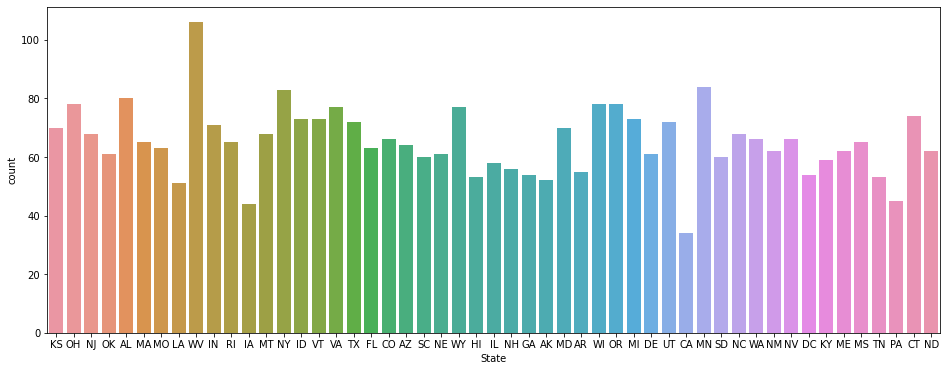

In [8]:
plt.figure( figsize=(16, 6))
sns.countplot(x ='State', data = df)
plt.show()

### Account length:

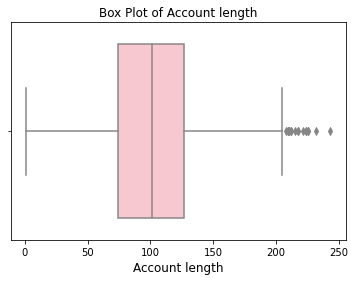

In [9]:
sns.boxplot(df["Account length"], orient = "h", color = "pink")
plt.title("Box Plot of Account length", fontsize= 12)
plt.xlabel("Account length", fontsize= 12)
plt.show()

In [10]:
df['Account length'] = np.where(df['Account length'] >= 200, np.nan, df['Account length'] )

### Area code

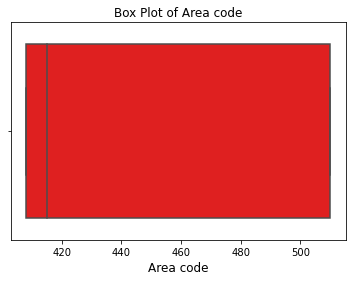

In [11]:
sns.boxplot(df["Area code"], orient = "h", color = "red")
plt.title("Box Plot of Area code", fontsize= 12)
plt.xlabel("Area code", fontsize= 12)
plt.show()

### International plan

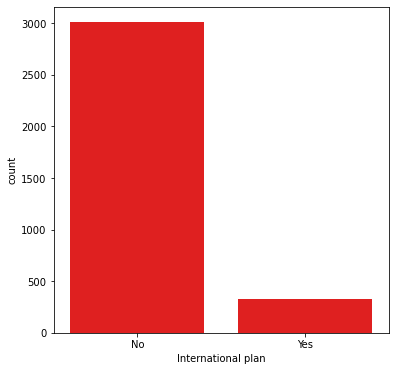

In [12]:
plt.figure( figsize=(6, 6))
sns.countplot(x ='International plan', data = df, color = 'red')
plt.show()

### Voice mail plan 

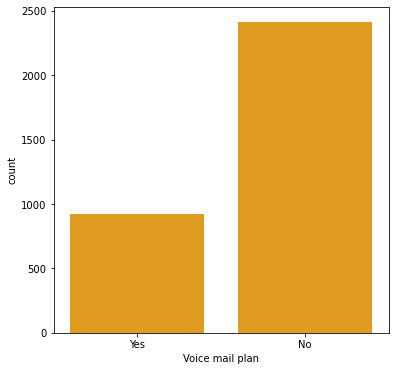

In [13]:
plt.figure( figsize=(6, 6))
sns.countplot(x ='Voice mail plan', data = df, color = 'orange')
plt.show()

### Number vmail messages

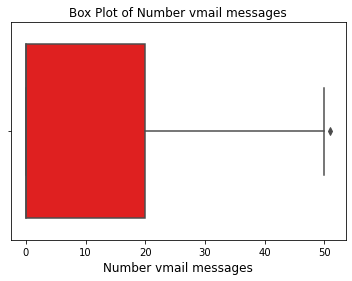

In [14]:
sns.boxplot(df["Number vmail messages"], orient = "h", color = "red")
plt.title("Box Plot of Number vmail messages", fontsize= 12)
plt.xlabel("Number vmail messages", fontsize= 12)
plt.show()

In [15]:
df['Number vmail messages'] = np.where(df['Number vmail messages'] >= 50, np.nan, df['Number vmail messages'] )

### Total day minutes

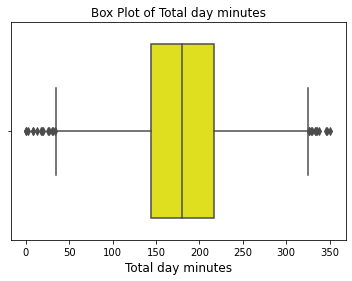

In [16]:
sns.boxplot(df["Total day minutes"], orient = "h", color = "yellow")
plt.title("Box Plot of Total day minutes", fontsize= 12)
plt.xlabel("Total day minutes", fontsize= 12)
plt.show()

In [17]:
df['Total day minutes'] = np.where(df['Total day minutes'] >= 325, np.nan, df['Total day minutes'] )
df['Total day minutes'] = np.where(df['Total day minutes'] <= 40, np.nan, df['Total day minutes'] )

### Total day calls 

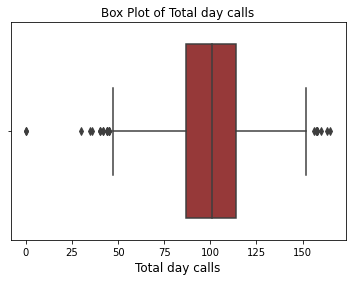

In [18]:
sns.boxplot(df["Total day calls"], orient = "h", color = "brown")
plt.title("Box Plot of Total day calls", fontsize= 12)
plt.xlabel("Total day calls", fontsize= 12)
plt.show()

In [19]:
df['Total day calls'] = np.where(df['Total day calls'] >= 150, np.nan, df['Total day calls'] )
df['Total day calls'] = np.where(df['Total day calls'] <= 50, np.nan, df['Total day calls'] )

### Total day charge 

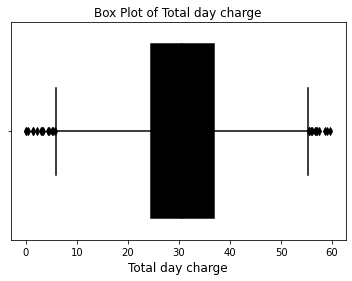

In [20]:
sns.boxplot(df["Total day charge"], orient = "h", color = "black")
plt.title("Box Plot of Total day charge", fontsize= 12)
plt.xlabel("Total day charge", fontsize= 12)
plt.show()

In [21]:
df['Total day charge'] = np.where(df['Total day charge'] >= 55, np.nan, df['Total day charge'] )
df['Total day charge'] = np.where(df['Total day charge'] <= 8, np.nan, df['Total day charge'] )

### Total eve minutes 

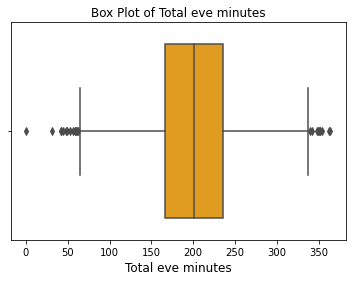

In [22]:
sns.boxplot(df["Total eve minutes"], orient = "h", color = "orange")
plt.title("Box Plot of Total eve minutes", fontsize= 12)
plt.xlabel("Total eve minutes", fontsize= 12)
plt.show()

In [23]:
df['Total eve minutes'] = np.where(df['Total eve minutes'] >= 340, np.nan, df['Total eve minutes'] )
df['Total eve minutes'] = np.where(df['Total eve minutes'] <= 60, np.nan, df['Total eve minutes'] )

### Total eve calls  

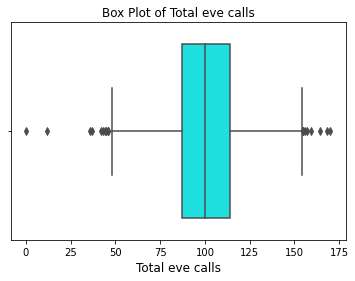

In [24]:
sns.boxplot(df["Total eve calls"], orient = "h", color = "cyan")
plt.title("Box Plot of Total eve calls", fontsize= 12)
plt.xlabel("Total eve calls", fontsize= 12)
plt.show()

In [25]:
df['Total eve calls'] = np.where(df['Total eve calls'] >= 160, np.nan, df['Total eve calls'] )
df['Total eve calls'] = np.where(df['Total eve calls'] <= 50, np.nan, df['Total eve calls'] )

### Total eve charge 

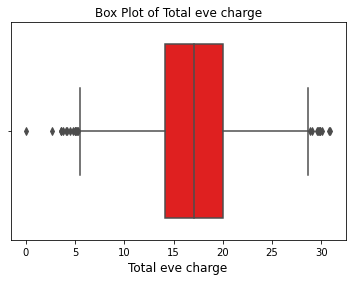

In [26]:
sns.boxplot(df["Total eve charge"], orient = "h", color = "red")
plt.title("Box Plot of Total eve charge", fontsize= 12)
plt.xlabel("Total eve charge", fontsize= 12)
plt.show()

In [27]:
df['Total eve charge'] = np.where(df['Total eve charge'] >= 28, np.nan, df['Total eve charge'] )
df['Total eve charge'] = np.where(df['Total eve charge'] <= 6, np.nan, df['Total eve charge'] )

### Total night minutes 

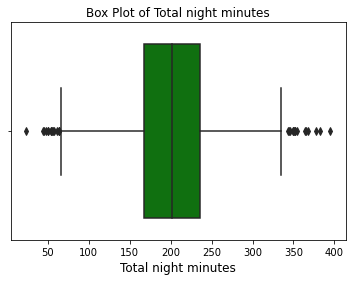

In [28]:
sns.boxplot(df["Total night minutes"], orient = "h", color = "green")
plt.title("Box Plot of Total night minutes", fontsize= 12)
plt.xlabel("Total night minutes", fontsize= 12)
plt.show()

In [29]:
df['Total night minutes'] = np.where(df['Total night minutes'] >= 340, np.nan, df["Total night minutes"] )
df['Total night minutes'] = np.where(df['Total night minutes'] <= 70 , np.nan, df["Total night minutes"] )

### Total night calls  

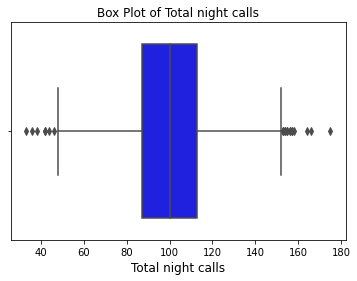

In [30]:
sns.boxplot(df["Total night calls"], orient = "h", color = "BLUE")
plt.title("Box Plot of Total night calls", fontsize= 12)
plt.xlabel("Total night calls", fontsize= 12)
plt.show()

In [31]:
df['Total night calls'] = np.where(df['Total night calls'] >= 155, np.nan, df['Total night calls'] )
df['Total night calls'] = np.where(df['Total night calls'] <= 50, np.nan, df['Total night calls'] )

### Total night charge 

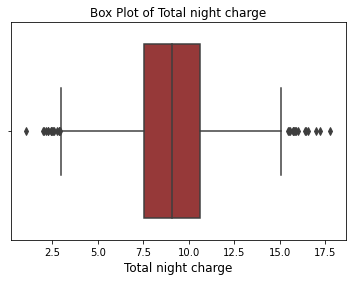

In [32]:
sns.boxplot(df["Total night charge"], orient = "h", color = "brown")
plt.title("Box Plot of Total night charge", fontsize= 12)
plt.xlabel("Total night charge", fontsize= 12)
plt.show()

In [33]:
df['Total night charge'] = np.where(df['Total night charge'] >= 15, np.nan, df['Total night charge'] )
df['Total night charge'] = np.where(df['Total night charge'] <= 2.7, np.nan, df['Total night charge'] )

### Total intl minutes 

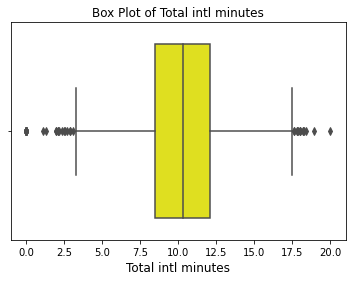

In [34]:
sns.boxplot(df["Total intl minutes"], orient = "h", color = "yellow")
plt.title("Box Plot of Total intl minutes", fontsize= 12)
plt.xlabel("Total intl minutes", fontsize= 12)
plt.show()

In [35]:
df['Total night charge'] = np.where(df['Total night charge'] >= 17.5, np.nan, df['Total night charge'] )
df['Total night charge'] = np.where(df['Total night charge'] <= 3, np.nan, df['Total night charge'] )

### Total intl calls 

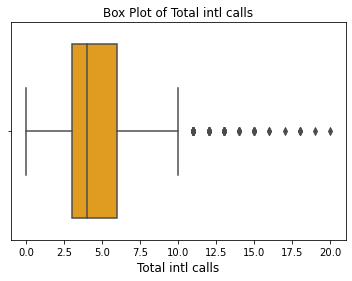

In [36]:
sns.boxplot(df["Total intl calls"], orient = "h", color = "orange")
plt.title("Box Plot of Total intl calls", fontsize= 12)
plt.xlabel("Total intl calls", fontsize= 12)
plt.show()

In [37]:
df['Total intl calls'] = np.where(df['Total intl calls'] >= 10, np.nan, df['Total intl calls'] )

 ### Total intl charge 

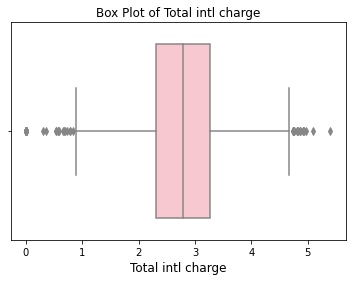

In [38]:
sns.boxplot(df["Total intl charge"], orient = "h", color = "pink")
plt.title("Box Plot of Total intl charge", fontsize= 12)
plt.xlabel("Total intl charge", fontsize= 12)
plt.show()

In [39]:
df['Total intl charge'] = np.where(df['Total intl charge'] >= 4.7, np.nan, df['Total intl charge'] )
df['Total intl charge'] = np.where(df['Total intl charge'] <= 1, np.nan, df['Total intl charge'] )

### Customer service calls

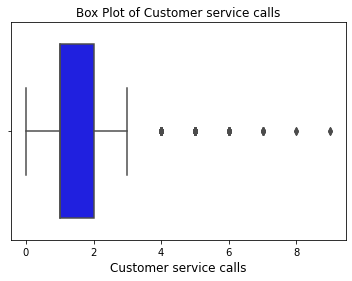

In [40]:
sns.boxplot(df["Customer service calls"], orient = "h", color = "blue")
plt.title("Box Plot of Customer service calls", fontsize= 12)
plt.xlabel("Customer service calls", fontsize= 12)
plt.show()

In [41]:
df['Customer service calls'] = np.where(df['Customer service calls'] >= 2.5, np.nan, df['Customer service calls'] )

### Churn

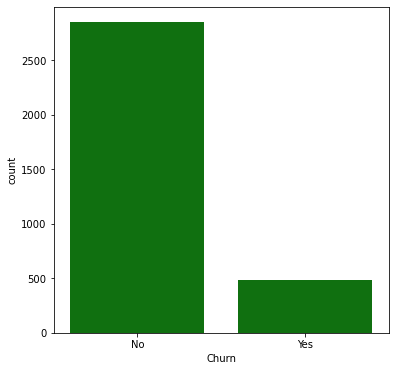

In [42]:
plt.figure( figsize=(6, 6))
sns.countplot(x ='Churn', data = df, color = 'green')
plt.show()

## What is the state where most churns occur? 
    
###    Is there statistical difference between the numbers of customer service calls received in this state compared to the remaining states? 
    
    
###   What do you observe?

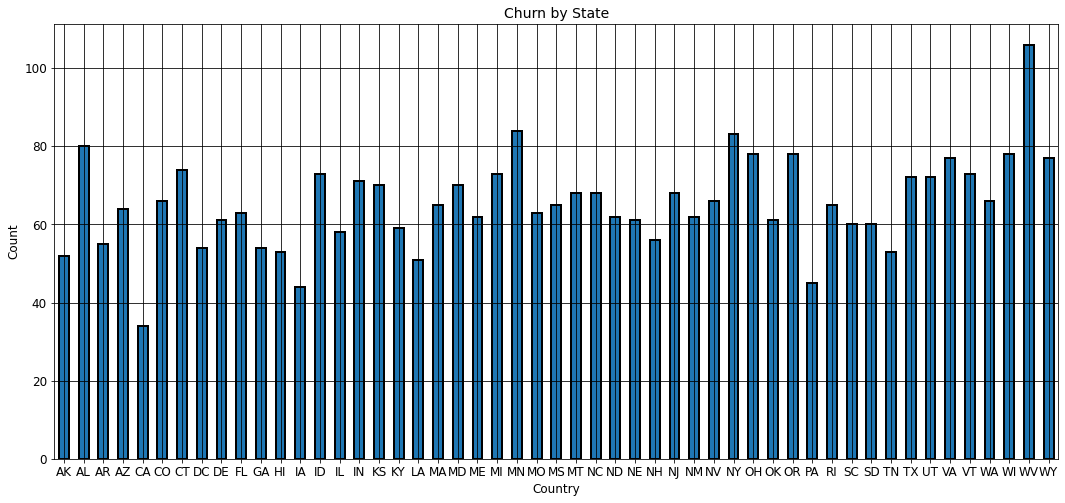

In [43]:
df.groupby("State")["Churn"].size().plot(kind= "bar",  edgecolor = "black",
                                                        figsize = (18,8), linewidth = 2)

plt.xlabel('Country', fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Churn by State', fontsize = 14)
plt.grid(color = "k")
plt.show()

                                                The WV State has most churns

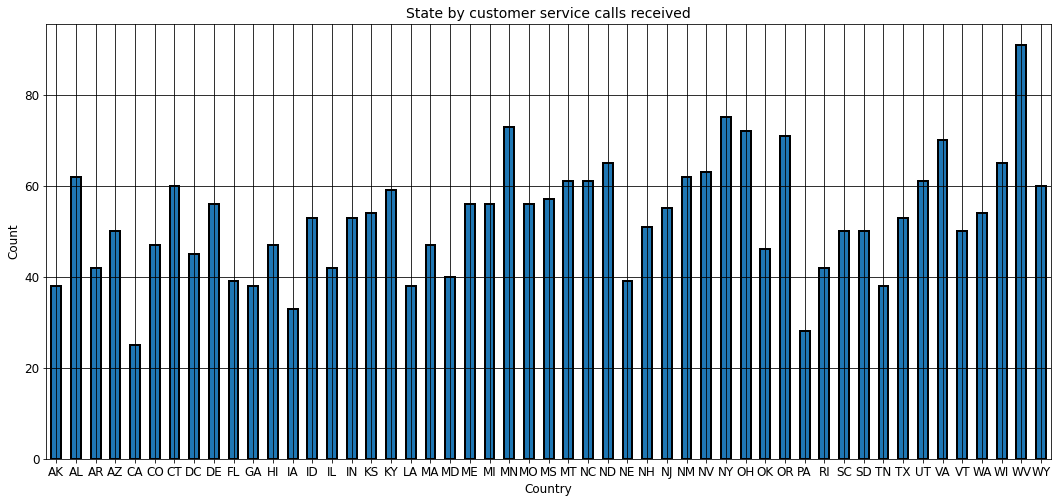

In [45]:
df.groupby(["State"])["Customer service calls"].sum().plot(kind= "bar",  edgecolor = "black",
                                                        figsize = (18,8), linewidth = 2)

plt.xlabel('Country', fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('State by customer service calls received', fontsize = 14)
plt.grid(color = "k")
plt.show()

            Yes We can easily see from above graph that churn has direct relationship with Customer service calls. 

# Data cleaning 

In [47]:
# check the null values in the dataset
df.isnull().sum()

State                       0
Account length             27
Area code                   0
International plan          0
Voice mail plan             0
Number vmail messages       3
Total day minutes          29
Total day calls            42
Total day charge           36
Total eve minutes          21
Total eve calls            25
Total eve charge           39
Total night minutes        33
Total night calls          22
Total night charge         34
Total intl minutes          0
Total intl calls          128
Total intl charge          62
Customer service calls    696
Churn                       0
dtype: int64

In [48]:
# to remove the missing values fill the null values in the dataset
df["Account length"] = df["Account length"].fillna(df['Account length'].mode()[0])
df["Number vmail messages"] = df["Number vmail messages"].ffill()
df["Total day minutes"] = df["Total day minutes"].ffill()
df["Total day calls"] = df["Total day calls"].ffill()
df["Total day charge"] = df["Total day charge"].ffill()
df["Total eve minutes"] = df["Total eve minutes"].ffill()
df["Total eve calls"] = df["Total eve calls"].ffill()
df["Total eve charge"] = df["Total eve charge"].ffill()
df["Total night minutes"] = df["Total night minutes"].ffill()
df["Total night calls"] = df["Total night calls"].ffill()
df["Total night charge"] = df["Total night charge"].ffill()
df["Total intl calls"] = df["Total intl calls"].ffill()
df["Total intl charge"] = df["Total intl charge"].ffill()
df["Customer service calls"] = df["Customer service calls"].ffill()

## What external data sources would be useful to enrich this dataset and why?

If we know that the person who is calling is boy or girl so we can analyze more and the proper time so we can easily see which time most people call.

# Heat Map

In [49]:
df = df.replace({"State":{'KS' : 0, 'OH': 1, 'NJ' : 2, 'OK': 3, 'AL': 4, 'MA': 5, 'MO': 6, 'LA': 7, 'WV': 8, 'IN': 9
                          , 'RI' : 10,'IA': 11, 'MT': 12, 'NY': 13, 'ID': 14, 'VT': 15, 'VA': 16, 'TX': 17, 'FL': 18
                          , 'CO': 19, 'AZ': 20, 'SC': 21,'NE': 22, 'WY': 23, 'HI': 24, 'IL': 25, 'NH': 26, 'GA' :27
                          , 'AK':28, 'MD':29, 'AR':30, 'WI':31, 'OR':32, 'MI':33, 'DE':34, 'UT':35, 'CA':36, 'MN':37
                          , 'SD':38, 'NC':39, 'WA':40, 'NM':41, 'NV':42, 'DC':43,'KY':44, 'ME':45, 'MS':46, 'TN':47
                          , 'PA':48, 'CT':49, 'ND':50}})

In [50]:
df = df.replace({"Area code":{408 :0, 415:1, 510:2}})

In [51]:
df = df.replace({"International plan":{'No' :0, 'Yes':1}})
df = df.replace({"Voice mail plan":{'No' :0, 'Yes':1}})
df = df.replace({"Churn":{"No" :0,"Yes":1}})

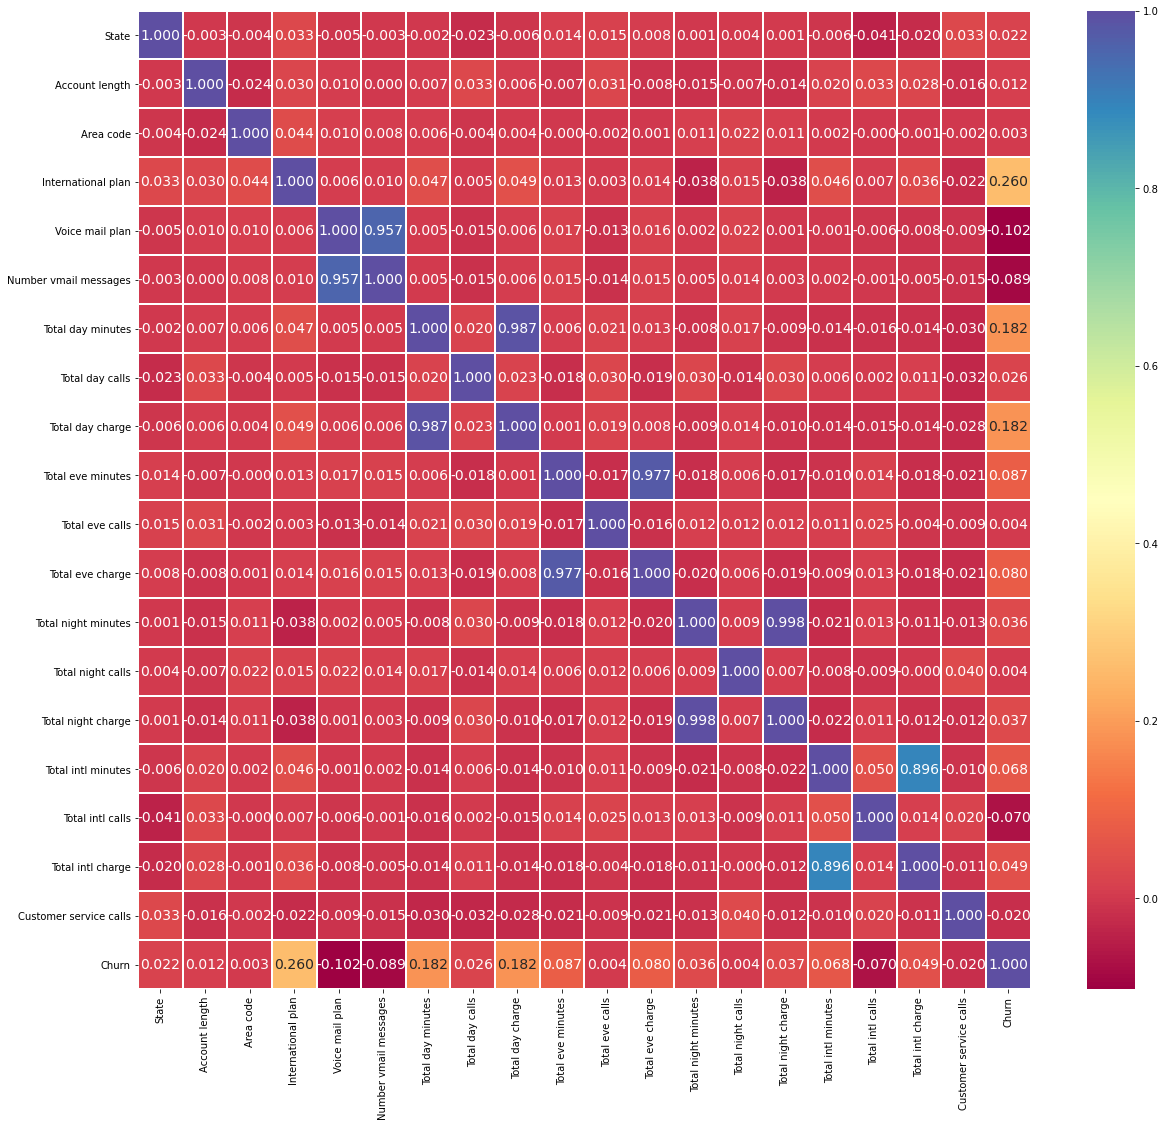

In [52]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(),linewidths = 1,annot = True, fmt = ".3f", annot_kws= {"size": 14}, cmap = "Spectral")
plt.show()

From Heat Map we can see that these three columns "International plan", "Total day charge", "Total day minutes" is correlating more with our target variable so these will become our feature varible for classification model

# Classification model development 

In [63]:
y = df['Churn']
X = df[["International plan", "Total day charge", "Total day minutes"]].values

### Develop and compare at least three classification models that predict customer churn. You are expected to perform hyperparameter tuning and choose the best combination.

**Gaussian Naive Bayes**

In [64]:
# hyperparameters
param_gb = {'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}

# Gaussian classifier
gb = GaussianNB() 
  
# GridsearchCV with crossvalidation = 5
gb_cv = GridSearchCV(gb, param_gb, cv = 5)
  
gb_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned GaussianNB  Best Parameters: {}".format(gb_cv.best_params_))
print("Best score is {}".format(gb_cv.best_score_))

Tuned GaussianNB  Best Parameters: {'var_smoothing': 1e-08}
Best score is 0.8457888173030603


**DecisionTreeClassifier**

In [72]:
# hyperparameters
param_dist = {"max_depth": [3,5],
              "criterion": ["gini", "entropy"]}

# Decision Tree classifier
tree = DecisionTreeClassifier() 
  
# GridsearchCV with crossvalidation = 5
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Best Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Best score is 0.8652903278090684


**SVC Classifier**

In [66]:
# defining parameter range
param_grid = {'C': [0.1, 1, 100], 
              'gamma': [1, 0.1, 0.01]} 
  
# SVC Classifier
svc = SVC()

# GridsearchCV with crossvalidation = 5
grid_svc = GridSearchCV(svc , param_grid, cv = 5)
  
# fitting the model for grid search
grid_svc.fit(X, y)

# Print the tuned parameters and score
print("Tuned SVC Best Parameters: {}".format(grid_svc.best_params_))
print("Best score is {}".format(grid_svc.best_score_))

Tuned SVC Best Parameters: {'C': 1, 'gamma': 0.1}
Best score is 0.8625867246556901


As you can see we use Gaussian , Decision tree and SVC Classifier, and we achieve best accuracy from Decision Tree Classifier which is 86.52%

### Develop and compare three ensemble classification models

#### Random Forest Classifier

In [67]:
# Create the parameter grid
param_rfc = {'min_samples_leaf': [4, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [300, 1000]}


# creating a rfc classifier
rfc = RandomForestClassifier() 

# GridsearchCV with crossvalidation = 5
rfc_cv = GridSearchCV(rfc, param_rfc, cv = 5)

# fitting the model for grid search
rfc_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Hyperparameter tunning best Parameters: {}".format(rfc_cv.best_params_)) 
print("Best score is {}".format(rfc_cv.best_score_))

Hyperparameter tunning best Parameters: {'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
Best score is 0.8508898703801252


**AdaBoostClassifier**

In [68]:
# Create the parameter grid 
param_abc = {'learning_rate': [0.001, 0.00001, 0.000001],
    'n_estimators': [300, 500]}


# creating a rfc classifier
ad  = AdaBoostClassifier() 

# GridsearchCV with crossvalidation = 5
ad_cv = GridSearchCV(ad, param_abc, cv = 5)
  
    
# fitting the model for grid search
ad_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Hyperparameter tunning best Parameters: {}".format(ad_cv.best_params_)) 
print("Best score is {}".format(ad_cv.best_score_))

Hyperparameter tunning best Parameters: {'learning_rate': 1e-05, 'n_estimators': 300}
Best score is 0.8631904768336552


**GradientBoostingClassifier**

In [69]:
# Create the parameter grid
param_gbc = {'learning_rate': [0.001, 0.00001, 0.000001],
    'n_estimators': [300, 500]}


# creating a rfc classifier
gbc  = GradientBoostingClassifier()

# GridsearchCV with crossvalidation = 5
gbc_cv = GridSearchCV(gbc, param_gbc, cv = 5)
  

# fitting the model for grid search
gbc_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Hyperparameter tunning best Parameters: {}".format(gbc_cv.best_params_)) 
print("Best score is {}".format(gbc_cv.best_score_))

Hyperparameter tunning best Parameters: {'learning_rate': 0.001, 'n_estimators': 300}
Best score is 0.8550859705282494


As you can see we use Random Forest Classifier,AdaBoost Classifier and GradientBoosting  Classifier, and we achieve best accuracy from AdaBoost Classifier which is 86.31%

**Analyze the results of your best performing classifier. Is it statistically different than the least performing classifier?**

As we can see the accuracy of all the classifier, best performing classifier is Decision Tree classifier which accuracy is 86.52%  if we see other classifier also there is no such big difference we see. so can say that all classifier are performing good in this dataset. 

### Novelty and Innovation

In this if we know the timming of the calls when most calls are coming then we can analyze which state is busy at what time. 